# Bike Sharing Case Study

## Table of Contents
* [General Info](#general-information)
* [Libraries Used](#libraries-used)
* [Reading and Understanding the Data](#reading-and-understading-data)
* [Data Cleaning](#data-cleaning)
* [Standerdizing Data](#standerizing-data)
* [Visualizing Data](#visualizing-data)
* [Data Preparation](#data-preparation)
* [Model Building](#model-building)
* [Residual Analysis](#residual-analysis)
* [Model Evaluation](#model-evaluation)
* [Conclusion](#conclusion)

<a name="general-information"></a>
## General Information
<b>Problem Statement:</b> <br>
A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <br><br>
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

<b>Goal of this project</b> <br>
Goal of this project is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

<a name="libraries-used"></a>
## Libraries Used                                                                                                                  
* NumPy: For numerical computations.
* Pandas: For data manipulation and analysis.
* Matplotlib: For creating visualizations.
* Seaborn: For statistical data visualization.
* Calendar: For date functions
* Warnings: To suppress warning messages.
* sklearn: Multiple functions to building model using liner regression
* statsmodels: For statistical computations.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import ProbPlot, qqplot

<a name="reading-and-understading-data"></a>
## Reading and Understanding the Data

<span style="color: darkcyan;"> Read data set 'day.csv' into a dataframe named 'bikes'</span>

In [10]:
bikes=pd.read_csv('day.csv')
bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [11]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<span style="color: blue;">
<li> Dataset is loaded into dataframe 'bikes'</li>
<li> Dataset have 730 rows and 16 columns. </li> 
<li> Data columns cross verified using data dictionary "day_dictionary.txt"</li>
</span>

<a name="data-cleaning"></a>
## Data cleaning

##### Drop irrelevant columns
<span style="color: darkcyan;">
<li>Drop column 'instant' as its just index of each record.</li>
<li>Drop column 'dteday' as its a date column with year & month data available in other columns and day is not revalant in this case study</li>
<li>Drop columns 'casual' and 'registered' as sum of these two is nothing but dependent/target variable 'cnt'</li>
</span>

In [15]:
bikes.drop(columns=['instant','dteday','casual','registered'],inplace=True,axis = 1)
bikes.shape

(730, 12)

##### Check for Missing Values

In [17]:
bikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<span style="color: blue;"> 
<li> No missing values </li>
</span>

##### Check for outliners

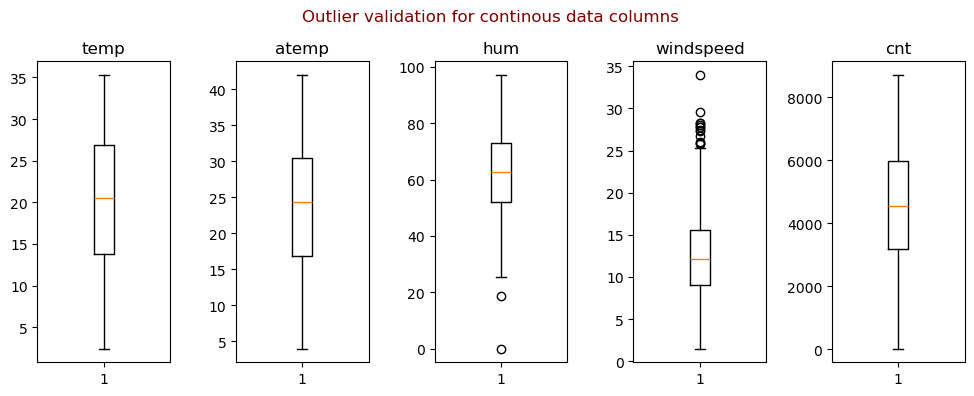

In [20]:
#Plot all numerical data to check any outliers
numeric_variables=['temp','atemp','hum','windspeed','cnt']

fig, axes = plt.subplots(1, 5, figsize=(10, 4))
fig.suptitle('Outlier validation for continous data columns',color='maroon')
fig.tight_layout()
fig.subplots_adjust(wspace=.5,top=0.85)

for i,col_name in enumerate(numeric_variables):
    ax = axes[i]
    ax.boxplot(bikes[col_name])
    ax.set_title(col_name, weight='light', fontsize=12,loc='center')

* <span style="color: blue;"> No outliers noticed in the data</span></span>

<a name="standerizing-data"></a>
## Standerdizing Data

##### Rename columns to improve readability

In [24]:
bikes.rename(columns={'yr': 'year', 'mnth': 'month','weathersit':'weather','atemp':'feels-like','hum':'humidity','cnt':'bike-rentals'}, inplace=True)

<span style="color: blue;">**Note::** Target/Dependent variable ('cnt') also renamed as <span style="text-decoration: underline">'bike-rentals'</span></span>

##### Replace categorical data values based on dictionary provided

In [27]:
bikes['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' }, inplace = True)
bikes['month'] = bikes['month'].apply(lambda x: calendar.month_abbr[x])
bikes['weekday'].replace({ 0: 'Sun',1:'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu',5:'Fri',6:'Sat'}, inplace = True)
bikes['weather'].replace({ 1: 'Sunny', 2: 'Cloudy', 3: 'Rainy', 4: 'Stromy' }, inplace = True)

In [28]:
bikes

,season,year,month,holiday,weekday,workingday,weather,temp,feels-like,humidity,windspeed,bike-rentals
0,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Thu,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,Dec,0,Fri,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,Dec,0,Sat,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,Dec,0,Sun,0,Sunny,10.489153,11.58500,48.3333,23.500518,1796


<a name="visualizing-data"></a>
## Visualizing Data

##### Visualizing Numerical & Continuous Data

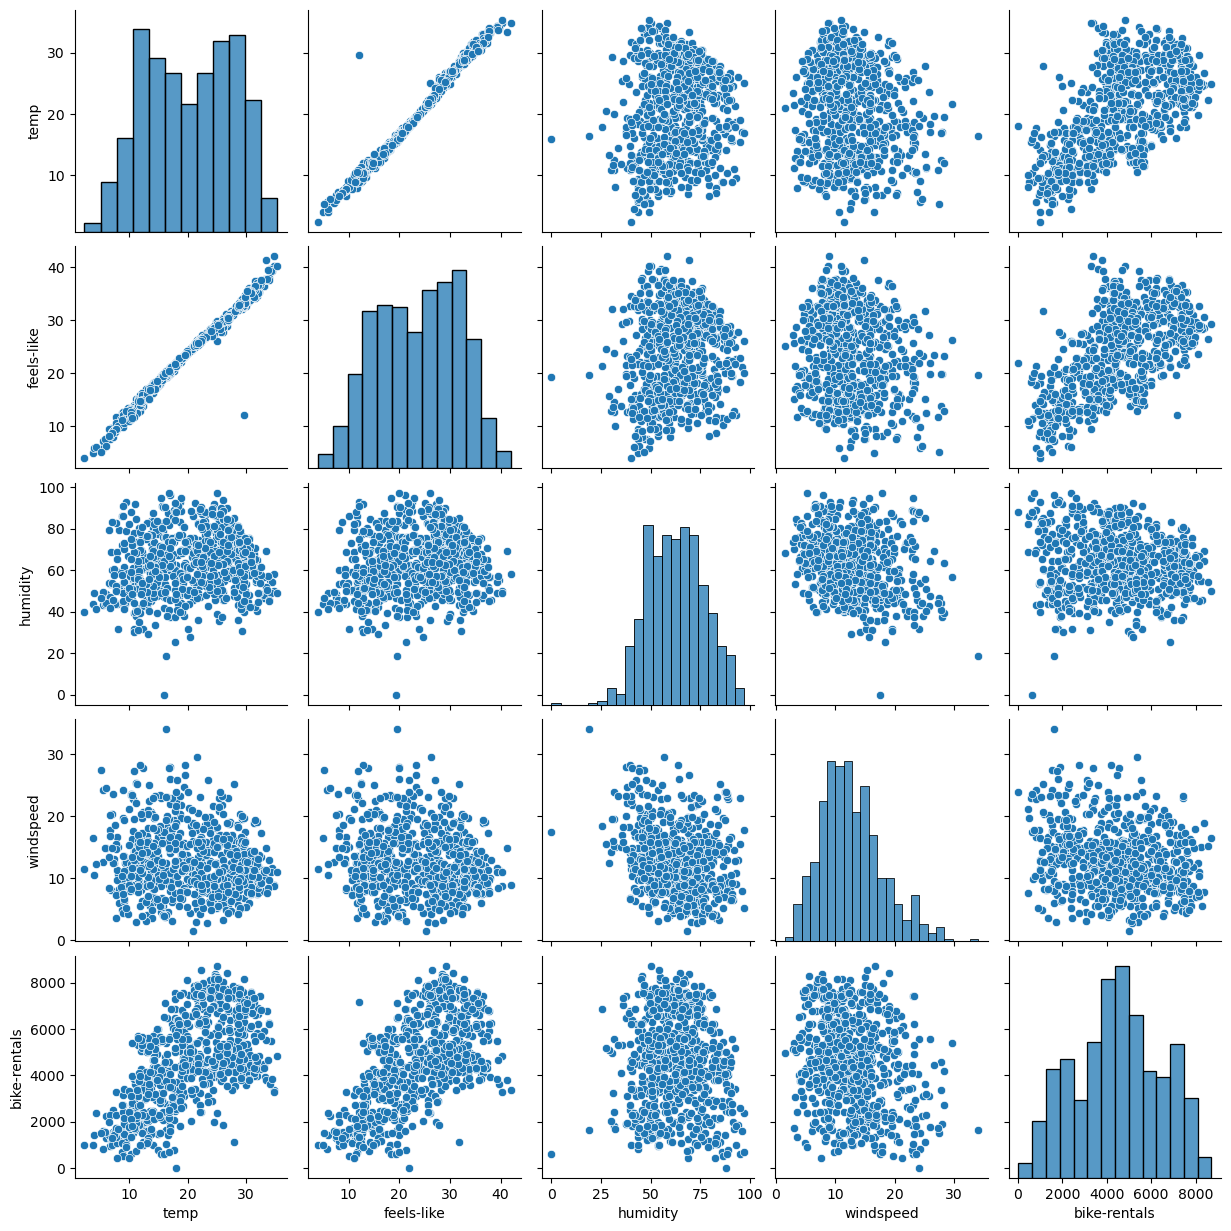

In [31]:
numeric_variables=['temp','feels-like','humidity','windspeed','bike-rentals']
sns.pairplot(data = bikes, vars=numeric_variables)
plt.show()

* <span style="color: blue;">Positive correlation between 'temp' and 'feels-like' </span>
* <span style="color: blue;">Positive correlation between target variable 'bike-rentals' and other independent variables namely 'temp', 'feels-like' </span>

##### Visualizing Categorical Data

In [34]:
categorical_variables=['year','month','season','weekday','holiday','workingday','weather']

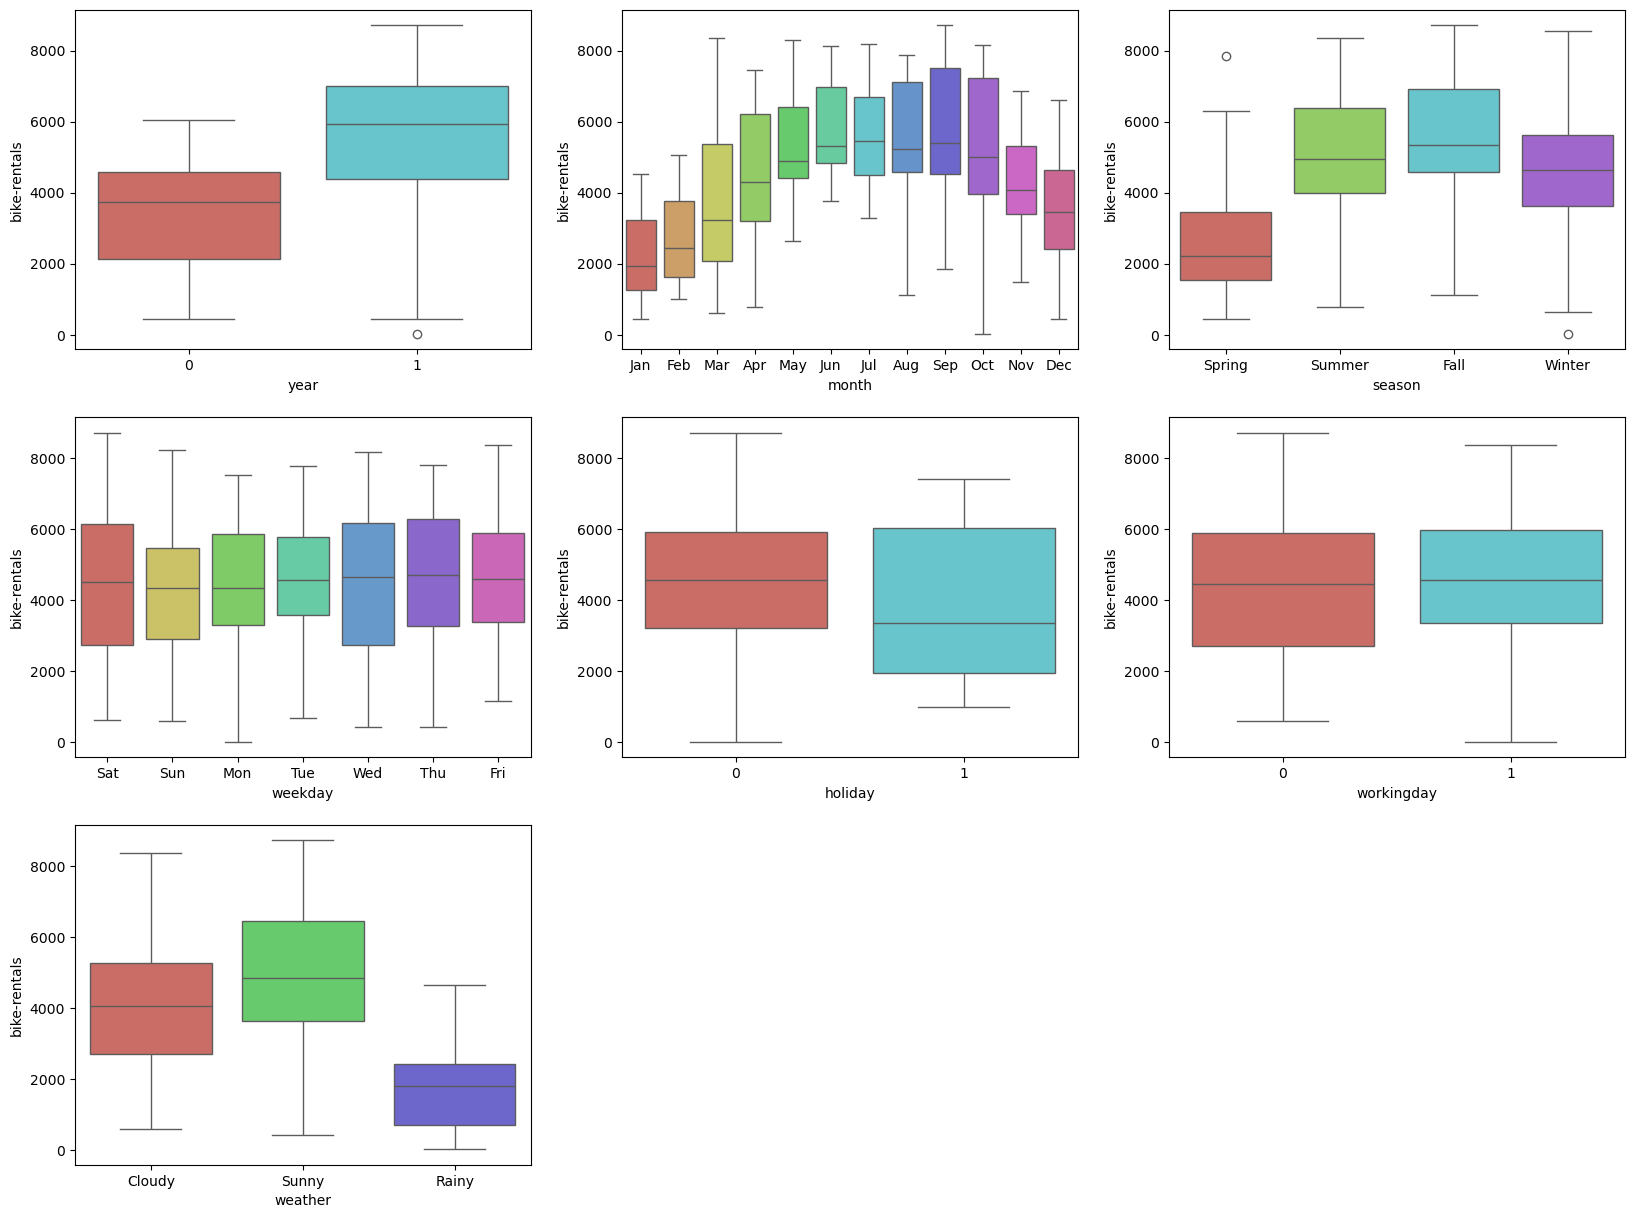

In [35]:
plt.figure(figsize=(20, 15))
plt.subplot(331)
sns.boxplot(x = 'year', y = 'bike-rentals', data = bikes,palette="hls")
plt.subplot(332)
sns.boxplot(x = 'month', y = 'bike-rentals', data = bikes,palette="hls")
plt.subplot(333)
sns.boxplot(x = 'season', y = 'bike-rentals', data = bikes,palette="hls")
plt.subplot(334)
sns.boxplot(x = 'weekday', y = 'bike-rentals', data = bikes,palette="hls")
plt.subplot(335)
sns.boxplot(x = 'holiday', y = 'bike-rentals', data = bikes,palette="hls")
plt.subplot(336)
sns.boxplot(x = 'workingday', y = 'bike-rentals', data = bikes,palette="hls")
plt.subplot(337)
sns.boxplot(x = 'weather', y = 'bike-rentals', data = bikes,palette="hls")
plt.show()

* <span style="color: blue;">Positive year to year growth : Bike rentals increased in 2019 compared to 2018</span>
* <span style="color: blue;">Month wise, highest recorded in September month </span>
* <span style="color: blue;">Season wise, fall recorded highest bike-rentals followed by summer.</span>
* <span style="color: blue;">Clearly lower bike-rentals on a Holiday </span>
* <span style="color: blue;">No significant difference in bike-rentals based on weekday. </span>
* <span style="color: blue;">More bike-rentals recorded during Sunny days (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)</span>


<a name="data-preparation"></a>
## Data Preparation

##### Dummy Variables
<span style="color: darkcyan;">Add dummy variables for categorical data</span>

In [39]:
bikes = pd.get_dummies(bikes,columns=["season","month","weekday","weather"],dtype=int,drop_first = True)
bikes

,year,holiday,workingday,temp,feels-like,humidity,windspeed,bike-rentals,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Rainy,weather_Sunny
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,1,0,0,0,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,0,0,0,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,1


##### Correlation Analysis
<span style="color: darkcyan;">Verify correlation between all variables</span>

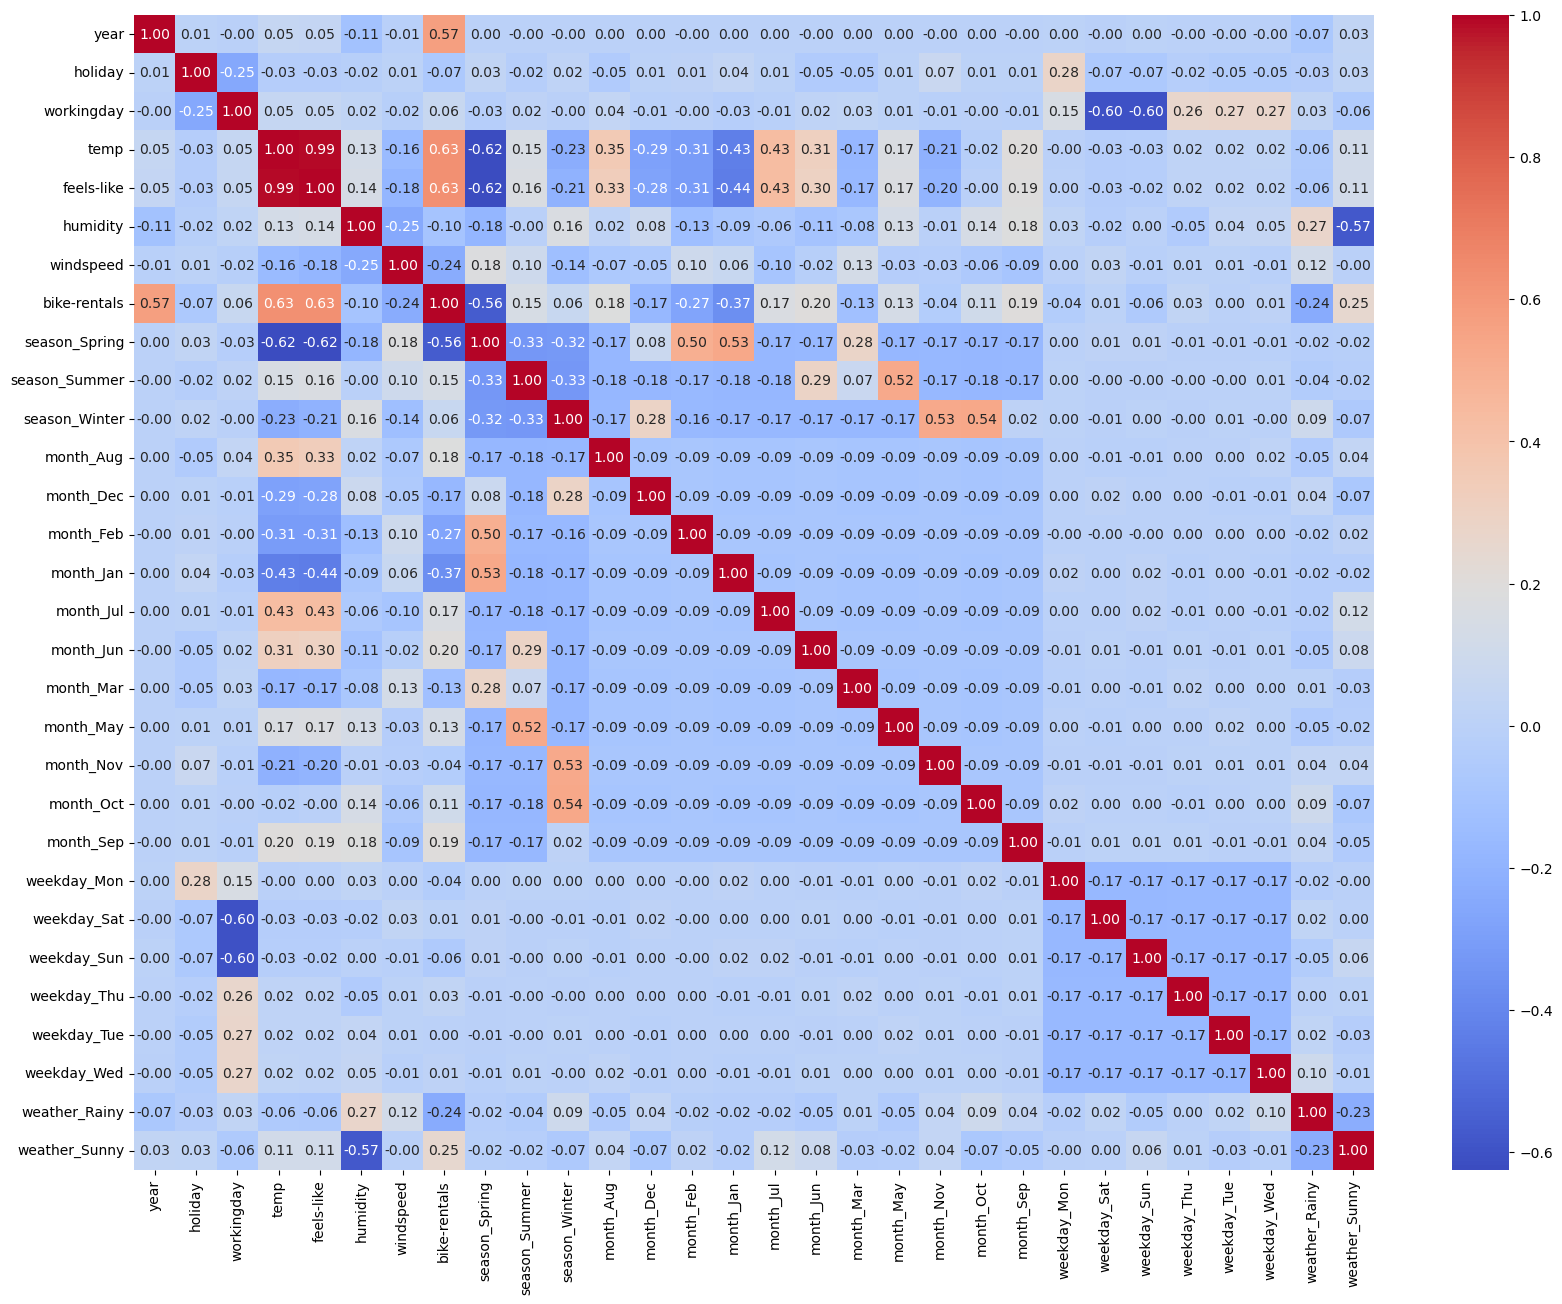

In [41]:
plt.figure(figsize = (20, 15))
sns.heatmap(bikes.corr(), annot = True,fmt=".2f",cmap="coolwarm")
plt.show()

<span style="color: blue;">
<li>Dependent/Target variable 'bike-rentals' is highly correlated with 'temp' followed by 'year'</li>
<li>Very strong correlation between 'temp' and 'feels-like'. Expected to get one of these dropped via RFE</li>
<li>Strong correlation noticed between below combinations.</li>
   <ul>* 'weekday_Sat' & 'workday_Sun with 'workingday'</ul>
   <ul>* 'season_Spring' with 'temp'</ul>
   <ul>* 'weather_Sunny' with 'humidity'</ul>
</span>

In [43]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   feels-like     730 non-null    float64
 5   humidity       730 non-null    float64
 6   windspeed      730 non-null    float64
 7   bike-rentals   730 non-null    int64  
 8   season_Spring  730 non-null    int32  
 9   season_Summer  730 non-null    int32  
 10  season_Winter  730 non-null    int32  
 11  month_Aug      730 non-null    int32  
 12  month_Dec      730 non-null    int32  
 13  month_Feb      730 non-null    int32  
 14  month_Jan      730 non-null    int32  
 15  month_Jul      730 non-null    int32  
 16  month_Jun      730 non-null    int32  
 17  month_Mar      730 non-null    int32  
 18  month_May 

<span style="color: blue;">We have 30 features after completing all data manipulations</span>

<a name="model-building"></a>
## Model Building

##### Splitting the Data into Training and Testing Sets 

In [47]:
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bikes_train.shape)
print(bikes_test.shape)

(510, 30)
(219, 30)


##### Rescaling the Features

In [49]:
scaler = MinMaxScaler()

variables_to_scale=['temp','humidity','windspeed','bike-rentals']

bikes_train[variables_to_scale] = scaler.fit_transform(bikes_train[variables_to_scale])

bikes_train.head()

,year,holiday,workingday,temp,feels-like,humidity,windspeed,bike-rentals,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Rainy,weather_Sunny
653,1,0,1,0.509887,23.0423,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,0


##### Dividing into X and y sets for model building

In [51]:
y_train = bikes_train.pop('bike-rentals')
X_train = bikes_train

##### Building model using statsmodel, for the detailed statistics

In [53]:
def buildmodel(X_train_lm,y_train,model_features):  
    X_train_lm = X_train[model_features]
    X_train_lm = sm.add_constant(X_train_lm)                            #Add constant to build model
    lm = sm.OLS(y_train,X_train_lm).fit()                                #Execute linear regression model (OLS: Ordinary Least Squares)
    print(lm.summary())                                                   #Print Statistical summary of model
    X_train_lm.drop('const', axis=1, inplace=True)
    return X_train_lm,lm

<span style="color: darkcyan;">Build inital model using all features</span>

In [55]:
model_features=list(X_train.columns)
X_train_lm = X_train
X_train_lm, lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.42e-181
Time:                        09:41:13   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1922      0.039      4.935

###### Feature selection 
* <span style="color: darkcyan;">Select top features using RFE (Recurssive Feature Elimination)</span>
* <span style="color: darkcyan;">Prepare dataframe with selected features</span>

In [57]:
# Running RFE with no. of features to select as 25
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=25)             
rfe = rfe.fit(X_train, y_train)

In [58]:
# RFE Feature Ranking
pd.DataFrame({'Rank' : rfe.ranking_, 'Selected': rfe.support_, 'Feature' : X_train.columns}).sort_values(by='Rank',ascending=True)

,Rank,Selected,Feature
0,1,True,year
25,1,True,weekday_Tue
24,1,True,weekday_Thu
23,1,True,weekday_Sun
22,1,True,weekday_Sat
21,1,True,weekday_Mon
20,1,True,month_Sep
19,1,True,month_Oct
18,1,True,month_Nov
17,1,True,month_May


<span style="color: darkcyan;">Building the model with All features selected by RFE</span>

In [60]:
model_features = list(X_train.columns[rfe.support_])
model_features

['year',
 'holiday',
 'workingday',
 'temp',
 'humidity',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'month_Aug',
 'month_Dec',
 'month_Feb',
 'month_Jan',
 'month_Jul',
 'month_May',
 'month_Nov',
 'month_Oct',
 'month_Sep',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thu',
 'weekday_Tue',
 'weather_Rainy',
 'weather_Sunny']

In [61]:
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.64e-185
Time:                        09:41:13   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1958      0.035      5.594

In [62]:
#High P-value for 'holiday', rebuild model by dropping this feature
model_features.remove('holiday')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.64e-185
Time:                        09:41:13   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1924      0.052      3.723

In [63]:
#High P-value for 'month_Oct', rebuild model by dropping this feature
model_features.remove('month_Oct')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.06e-186
Time:                        09:41:13   Log-Likelihood:                 527.83
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1948      0.051      3.834

In [64]:
#High P-value for 'weekday_Thu', rebuild model by dropping this feature
model_features.remove('weekday_Thu')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.87e-187
Time:                        09:41:13   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1923      0.051      3.808

In [65]:
#High P-value for 'month_Aug', rebuild model by dropping this feature
model_features.remove('month_Aug')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.12e-188
Time:                        09:41:13   Log-Likelihood:                 527.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -917.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2006      0.049      4.114

In [66]:
#High P-value for 'weekday_Tue', rebuild model by dropping this feature
model_features.remove('weekday_Tue')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.09e-188
Time:                        09:41:13   Log-Likelihood:                 526.86
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     489   BIC:                            -922.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1993      0.049      4.088

In [67]:
#High P-value for 'weekday_Mon', rebuild model by dropping this feature
model_features.remove('weekday_Mon')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.59e-189
Time:                        09:41:13   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1895      0.048      3.953

In [68]:
#High P-value for 'month_May', rebuild model by dropping this feature
model_features.remove('month_May')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.55e-190
Time:                        09:41:13   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1773      0.047      3.754

In [69]:
#High P-value for 'month_Feb', rebuild model by dropping this feature
model_features.remove('month_Feb')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          9.55e-191
Time:                        09:41:13   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1641      0.047      3.523

In [70]:
#High P-value for 'weekday_Sun', rebuild model by dropping this feature
model_features.remove('weekday_Sun')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.53e-191
Time:                        09:41:13   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2098      0.040      5.212

<span style="color: blue;">All features have good P-value, moving forward</span>

##### Multicollinearity checks

In [73]:
def checkvif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [74]:
# Checking VIF for all variables of new model
checkvif(X_train_lm)

         Features    VIF
3        humidity  26.34
2            temp  22.25
5   season_Spring   5.07
1      workingday   4.76
4       windspeed   4.75
7   season_Winter   4.37
15  weather_Sunny   3.58
6   season_Summer   3.03
0            year   2.09
13    weekday_Sat   1.85
11      month_Nov   1.83
9       month_Jan   1.77
10      month_Jul   1.60
8       month_Dec   1.59
12      month_Sep   1.42
14  weather_Rainy   1.16


In [75]:
# 'humidity' having high VIF, rebuilding model after dropping this feature
model_features.remove('humidity')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.71e-189
Time:                        09:41:13   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1168      0.033      3.551

In [76]:
checkvif(X_train_lm)

         Features   VIF
2            temp  7.77
3       windspeed  4.73
1      workingday  4.69
4   season_Spring  3.21
6   season_Winter  3.00
14  weather_Sunny  2.87
5   season_Summer  2.30
0            year  2.08
12    weekday_Sat  1.85
10      month_Nov  1.79
8       month_Jan  1.66
9       month_Jul  1.60
7       month_Dec  1.48
11      month_Sep  1.34
13  weather_Rainy  1.12


In [77]:
# 'temp' having high VIF, rebuilding model after dropping this feature
model_features.remove('temp')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.05e-162
Time:                        09:41:14   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4560      0.020     22.819

In [78]:
# Huge drop in R2 score after dropping 'temp', this can be explained as 'temp' have highest coeff value among the features.
# Adding back 'temp' and dropping next feature with high VIF i.e, 'windspeed'

model_features.append('temp')
model_features.remove('windspeed')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.15e-181
Time:                        09:41:14   Log-Likelihood:                 493.37
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     495   BIC:                            -893.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0561      0.033      1.709

In [79]:
checkvif(X_train_lm)

         Features   VIF
13           temp  7.20
1      workingday  4.66
4   season_Winter  2.89
12  weather_Sunny  2.86
2   season_Spring  2.55
0            year  2.07
3   season_Summer  2.04
10    weekday_Sat  1.83
8       month_Nov  1.77
6       month_Jan  1.65
7       month_Jul  1.60
5       month_Dec  1.48
9       month_Sep  1.34
11  weather_Rainy  1.11


In [80]:
# As 'temp' can't be dropped, dropping next feature with high VIF i.e, 'season_Summer'
model_features.remove('season_Summer')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.55e-182
Time:                        09:41:14   Log-Likelihood:                 492.04
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     496   BIC:                            -896.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0907      0.025      3.653

In [81]:
# As 'temp' can't be dropped, dropping next feature with high VIF i.e, 'workingday'
model_features.remove('workingday')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.11e-178
Time:                        09:41:14   Log-Likelihood:                 480.09
No. Observations:                 510   AIC:                            -934.2
Df Residuals:                     497   BIC:                            -879.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1363      0.024      5.799

In [82]:
# High P-value for 'weekday_Sat', rebuilding model after dropping this feature
model_features.remove('weekday_Sat')
X_train_lm,lm=buildmodel(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike-rentals   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.11e-178
Time:                        09:41:14   Log-Likelihood:                 478.66
No. Observations:                 510   AIC:                            -933.3
Df Residuals:                     498   BIC:                            -882.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1402      0.023      5.981

In [83]:
# All features have good p-value, checking VIF again
checkvif(X_train_lm)

         Features   VIF
10           temp  3.93
9   weather_Sunny  2.82
2   season_Winter  2.50
0            year  2.06
1   season_Spring  2.03
6       month_Nov  1.77
4       month_Jan  1.63
3       month_Dec  1.46
5       month_Jul  1.32
7       month_Sep  1.20
8   weather_Rainy  1.10


<span style="color: blue;">Both VIF and P-values are in expected range. Concluding with this Model as final. </span>

In [85]:
lm.params

const            0.140185
year             0.233821
season_Spring   -0.110322
season_Winter    0.073785
month_Dec       -0.040958
month_Jan       -0.039120
month_Jul       -0.060748
month_Nov       -0.057220
month_Sep        0.058346
weather_Rainy   -0.226776
weather_Sunny    0.078377
temp             0.432617
dtype: float64

<a name="residue-analysis"></a>
## Residual Analysis

<span style="color: darkcyan;">Visualizing residuals using QQ plot</span>

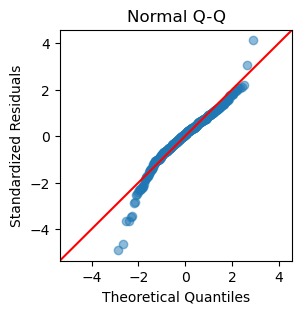

In [88]:
QQ = ProbPlot(lm.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

<span style="color: blue;">Residuals from model are normally distributed</span>

<span style="color: darkcyan;">Predict using model built</span>

In [91]:
X_train_lm = sm.add_constant(X_train_lm)
y_train_predicted = lm.predict(X_train_lm)

<span style="color: darkcyan;">Error Terms</span>

Text(0.5, 0, 'Errors')

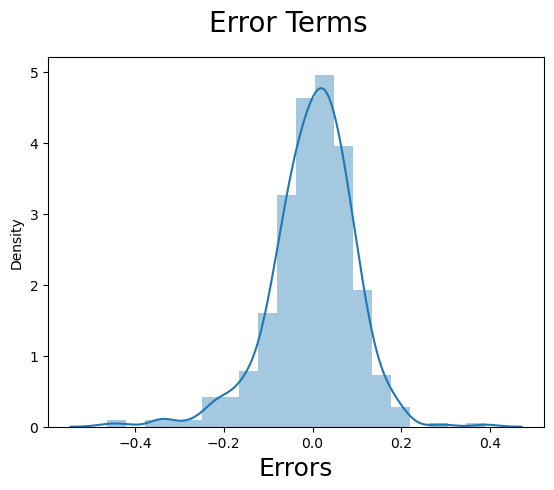

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

<span style="color: darkcyan;">Train Vs Predicated</span>

Text(0, 0.5, 'y_pred')

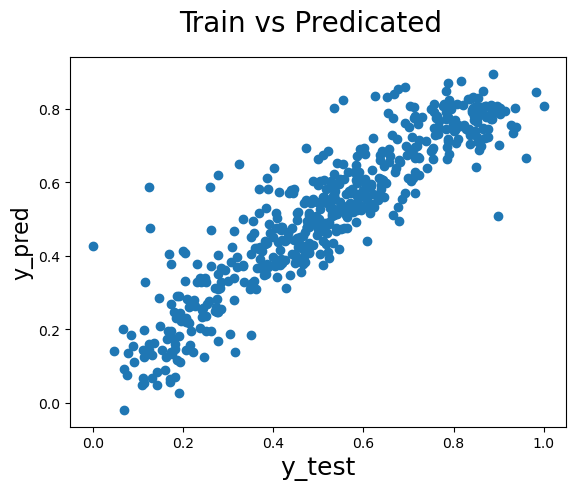

In [95]:
fig = plt.figure()
plt.scatter(y_train, y_train_predicted)
fig.suptitle('Train vs Predicated', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [96]:
#Train R2 Score
train_r2score=r2_score(y_train,y_train_predicted)
train_r2score

0.82202070143854

In [97]:
train_adj_r2score = 1 - (1 - train_r2score) * (y_train.shape[0] - 1) / (y_train.shape[0] - len(model_features) - 1)
train_adj_r2score

0.8180894317916001

<a name="model-evaluation"></a>
## Model Evaluation

In [99]:
bikes_test[variables_to_scale] = scaler.transform(bikes_test[variables_to_scale])
bikes_test.head()

,year,holiday,workingday,temp,feels-like,humidity,windspeed,bike-rentals,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Rainy,weather_Sunny
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,0
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.511964,22.85230,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,0
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.817246,32.19710,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,1


<span style="color: darkcyan;">Predict using model built</span>

In [101]:
y_test = bikes_test.pop('bike-rentals')
X_test = bikes_test[model_features]
X_test_lm = sm.add_constant(X_test)
y_test_predicted = lm.predict(X_test_lm)

<span style="color: darkcyan;">Error Terms</span>

Text(0.5, 0, 'Errors')

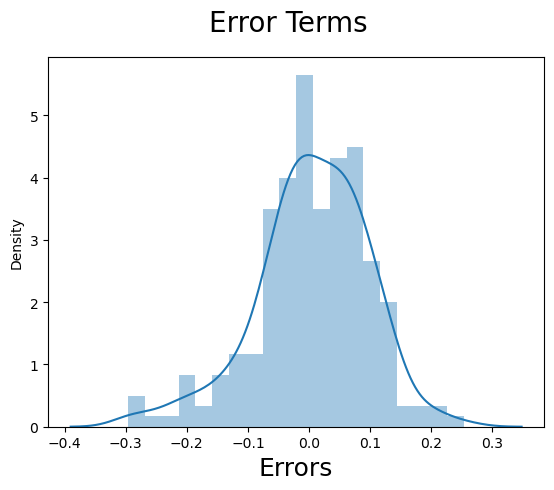

In [103]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

<span style="color: darkcyan;">Test Vs Predicated</span>

Text(0, 0.5, 'y_pred')

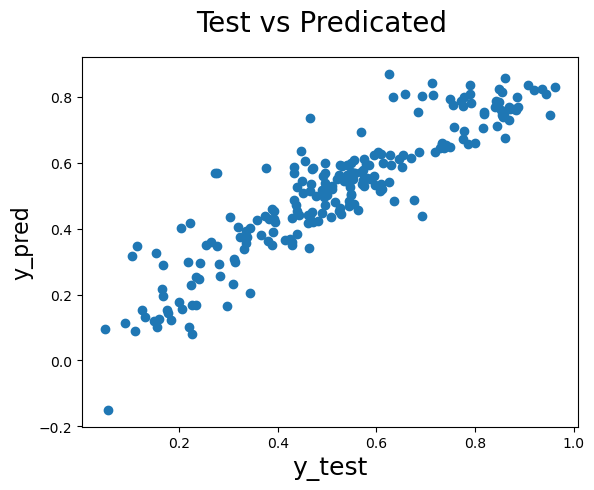

In [105]:
fig = plt.figure()
plt.scatter(y_test, y_test_predicted)
fig.suptitle('Test vs Predicated', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [106]:
#Test R2 Score
test_r2score=r2_score(y_test,y_test_predicted)
test_r2score

0.8211286729804208

In [107]:
#Test Adjusted R2 Score
test_adj_r2score = 1 - (1 - test_r2score) * (y_test.shape[0] - 1) / (y_test.shape[0] - len(model_features) - 1)
test_adj_r2score

0.8116234333803466

##### R² Comparision

In [109]:
print('Train R² Score : ',round(train_r2score,3))
print('Test  R² Score : ',round(test_r2score,3))
print('Train - Test   : ',round(train_r2score-test_r2score,3))

Train R² Score :  0.822
Test  R² Score :  0.821
Train - Test   :  0.001


In [110]:
print('Train Adjusted  R² Score : ',round(train_adj_r2score,3))
print('Test  Adjusted  R² Score : ',round(test_adj_r2score,3))
print('Train - Test             : ',round(train_adj_r2score-test_adj_r2score,3))

Train Adjusted  R² Score :  0.818
Test  Adjusted  R² Score :  0.812
Train - Test             :  0.006


<a name="conclusion"></a>
## Conclusion

* **Model built with <span style="color: BlueViolet;">Train R²</span> <span style="color: blue;">82.2%</span> & <span style="color: BlueViolet;">Test R² </span><span style="color: blue;">82.1%</span> and <span style="color: BlueViolet;">Train Adjusted R²</span> <span style="color: blue;">81.8%</span> & <span style="color: BlueViolet;">Test Adjusted R² </span><span style="color: blue;">81.2%</span>**
<br><br>
* **<span style="color: BlueViolet;">Most favorable factors</span> for bike demand       : <span style="color: blue;"> Temperature, Year, Winter Seaon, September Month, Sunny weather </span>**
<br><br>
* **<span style="color: BlueViolet;">Not so favorable factors</span> for bike demand : <span style="color: blue;">Rainy weather, Spring Season, Nov to Jan Months, Jul Month, Sep Month </span>**